In [1]:
# Creating a chatbot with tools capabilites from arxiv,wikipedia search and some functions 

In [1]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper

In [2]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)

arxiv


In [3]:
arxiv.invoke("atttention is you all need")

'Published: 2018-07-02\nTitle: The Matrix Calculus You Need For Deep Learning\nAuthors: Terence Parr, Jeremy Howard\nSummary: This paper is an attempt to explain all the matrix calculus you need in order\nto understand the training of deep neural networks. We assume no math knowledge\nbeyond what you learned in calculus 1, and provide links to help you refresh\nthe necessary math where needed. Note that you do not need to understand this\nmaterial before you start learning to train and use deep learning'

In [4]:
api_wrapper_wikipedia=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
Wikipedia=WikipediaQueryRun(api_wrapper=api_wrapper_wikipedia)

In [5]:
Wikipedia.invoke("What is machine learning")

'Page: Machine learning\nSummary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.\nML fi'

In [6]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ['TAVILY_API_KEY']=os.getenv('TAVILY_API_KEY')
os.environ['GROQ_API_KEY']=os.getenv("GROQ_API_KEY")
LANGSMITH_TRACING=True
LANGSMITH_ENDPOINT="https://api.smith.langchain.com"
LANGSMITH_API_KEY="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"
LANGSMITH_PROJECT="ReAct"


In [7]:
def add(a: int, b:int)->int:
    """
    Add a and b
    Args:
        a(int): first int
        b(int): second int
    Returns:
        int:
    """
    return a+b
def divide(a: int, b:int)->int:
    """
    divide a and b
    Args:
        a(int): first int
        b(int): second int
    Returns:
        int:
    """
    return a/b

def multiply(a: int, b:int)->int:
    """
    multiply a and b
    Args:
        a(int): first int
        b(int): second int
    Returns:
        int:
    """
    return a*b

In [8]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavily_search_tool=TavilySearchResults()

In [9]:
tavily_search_tool.invoke("What is the most recent AI news for june 10 2025 ")

[{'title': 'Surprising AI News and Developments in June 2025 - deepai.report',
  'url': 'https://deepai.report/surprising-ai-news-and-developments-in-june-2025/',
  'content': 'Major AI Developments in June 2025 June 2025 proved to be a landmark month for artificial intelligence, bringing major breakthroughs, high-profile product launches, big business moves, new regulatory pressures, and even some controversies. Below is a comprehensive report on the most surprising and significant AI news from June 2025, organized by category for clarity. Research Breakthroughs in',
  'score': 0.8783249},
 {'title': 'Latest AI Breakthroughs and News: May-June 2025 - Crescendo.ai',
  'url': 'https://www.crescendo.ai/news/latest-ai-news-and-updates',
  'content': '### Mind-Reading AI Converts Thoughts Into Speech\n\nDate: June 16, 2025  \nSummary: Australian researchers have developed a brain-computer interface (BCI) that uses AI to translate brain signals into words. The system successfully converts i

In [10]:
tools=[arxiv,Wikipedia,tavily_search_tool,add,multiply,divide]

In [11]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="llama3-70b-8192")
llm.invoke("hi")

AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 11, 'total_tokens': 36, 'completion_time': 0.071428571, 'prompt_time': 0.000123188, 'queue_time': 0.092959026, 'total_time': 0.071551759}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run-33401ad4-3ef0-4bac-8bd3-67d1bc622de1-0', usage_metadata={'input_tokens': 11, 'output_tokens': 25, 'total_tokens': 36})

In [12]:
llm_with_tools=llm.bind_tools(tools)

In [13]:
from pprint import pprint
from langchain_core.messages import HumanMessage,AIMessage

llm_with_tools.invoke([HumanMessage(content="what is recent AI news for 10jun 2025",name="wasif")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '30ckm0gnv', 'function': {'arguments': '{"query":"AI news 10jun 2025"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 50, 'prompt_tokens': 1618, 'total_tokens': 1668, 'completion_time': 0.242476918, 'prompt_time': 0.061351983, 'queue_time': 0.098318884, 'total_time': 0.303828901}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-88d9ff00-f6bb-4912-860d-71457dbb565d-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'AI news 10jun 2025'}, 'id': '30ckm0gnv', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1618, 'output_tokens': 50, 'total_tokens': 1668})

In [14]:
llm_with_tools.invoke([HumanMessage(content="what is recent AI news for 10jun 2025",name="wasif")]).tool_calls

[{'name': 'arxiv',
  'args': {'query': 'recent AI news'},
  'id': 'rex28gte8',
  'type': 'tool_call'}]

In [15]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from langgraph.graph import add_messages
from typing import Annotated

class State(TypedDict):
    messages: Annotated[list[AnyMessage],add_messages]

In [16]:
def calling_tool_llm(state:State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [17]:
from IPython.display import display,Image
from langgraph.graph import StateGraph,END,START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


builder=StateGraph(State)

builder.add_node("calling_tool_llm",calling_tool_llm)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"calling_tool_llm")
builder.add_conditional_edges("calling_tool_llm",tools_condition)
builder.add_edge("tools","calling_tool_llm")

graph=builder.compile()

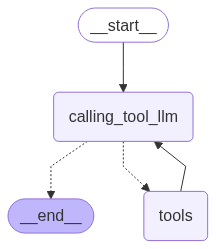

In [18]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [19]:
from pprint import pprint


messages=graph.invoke({"messages":"What is recent ai news in trend, the add 45 amd 90 then divide by the 12, and after that multiply by 0"})

for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

What is recent ai news in trend, the add 45 amd 90 then divide by the 12, and after that multiply by 0
================================== Ai Message ==================================

There are many recent AI news trends, but I'll provide a brief overview. AI is being applied in various industries, including healthcare, finance, education, and transportation. Some recent developments include:

1. Advancements in natural language processing, enabling chatbots and virtual assistants to better understand and respond to human language.
2. Increased adoption of AI-powered chatbots in customer service and tech support.
3. Growth of AI in healthcare, including diagnosis, treatment planning, and personalized medicine.
4. Development of autonomous vehicles, with many companies investing in self-driving car technology.
5. Expansion of AI in education, including adaptive learning systems and AI-powered tutoring pla

In [20]:
messages=graph.invoke({"messages":"Whos is the founder of wahabism"})

for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

Whos is the founder of wahabism
================================== Ai Message ==================================
Tool Calls:
  wikipedia (sv957q66x)
 Call ID: sv957q66x
  Args:
    query: Muhammad ibn Abd al-Wahhab
================================= Tool Message =================================
Name: wikipedia

Page: Muhammad ibn Abd al-Wahhab
Summary: Muḥammad ibn ʿAbd al-Wahhāb ibn Sulaymān al-Tamīmī (1703–1792) was a Sunni Muslim scholar, theologian, preacher, activist, religious leader, jurist, and reformer, who was from Najd in Arabian Peninsula and is considered as the eponymous founder of the Wahhabi movement. His prominent students included his sons Ḥusayn, Abdullāh, ʿAlī, and Ibrāhīm, his grandson ʿAbdur-Raḥman ibn Ḥasan, his son-in-law ʿAbdul-ʿAzīz ibn Muḥammad ibn Saʿūd, Ḥamād ibn Nāṣir ibn 
================================== Ai Message ==================================

The founder of Wahabis

# Agent Memory

In [21]:
messages=graph.invoke({"messages":"what is 5 plus 8"})

for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

what is 5 plus 8
================================== Ai Message ==================================
Tool Calls:
  add (yq6st2335)
 Call ID: yq6st2335
  Args:
    a: 5
    b: 8
================================= Tool Message =================================
Name: add

13
================================== Ai Message ==================================

The answer is 13.


In [22]:

messages=[HumanMessage(content="divide that by 10")]
messages=graph.invoke({"messages":messages})
for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

divide that by 10
================================== Ai Message ==================================
Tool Calls:
  divide (629bzgqbq)
 Call ID: 629bzgqbq
  Args:
    a: 10
    b: 10
================================= Tool Message =================================
Name: divide

1.0
================================== Ai Message ==================================

The result is 1.0.


In [23]:
from IPython.display import display,Image
from langgraph.graph import StateGraph,END,START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


builder=StateGraph(State)

builder.add_node("calling_tool_llm",calling_tool_llm)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"calling_tool_llm")
builder.add_conditional_edges("calling_tool_llm",tools_condition)
builder.add_edge("tools","calling_tool_llm")

graph=builder.compile()

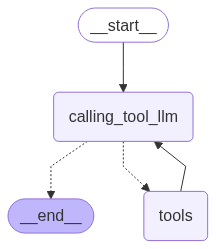

In [24]:
from langgraph.checkpoint.memory import MemorySaver
checkpointer=MemorySaver()
memory_graph=builder.compile(checkpointer=checkpointer)
display(Image(graph.get_graph().draw_mermaid_png()))

In [25]:
config={"configurable":{"thread_id":"1"}}
messages=[HumanMessage(content="add 45 to 78")]
messages=memory_graph.invoke({"messages":messages},config=config)
for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

add 45 to 78
================================== Ai Message ==================================
Tool Calls:
  add (bj8shnbhx)
 Call ID: bj8shnbhx
  Args:
    a: 45
    b: 78
================================= Tool Message =================================
Name: add

123
================================== Ai Message ==================================

The result is 123.


In [27]:
messages=[HumanMessage(content="add that number to 56")]
messages=memory_graph.invoke({"messages":messages},config=config)
for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

add 45 to 78
================================== Ai Message ==================================
Tool Calls:
  add (bj8shnbhx)
 Call ID: bj8shnbhx
  Args:
    a: 45
    b: 78
================================= Tool Message =================================
Name: add

123
================================== Ai Message ==================================

The result is 123.
================================ Human Message =================================

add that number to 56
================================== Ai Message ==================================
Tool Calls:
  add (vsc02acrs)
 Call ID: vsc02acrs
  Args:
    a: 123
    b: 56
================================= Tool Message =================================
Name: add

179
================================== Ai Message ==================================

The result is 179.
================================ Human Message =================================

add th

In [37]:
def vowel_checker(word: str) -> str:
    vowel_small = ['a', 'e', 'i', 'o', 'u']
    vowel_capital = ['A', 'E', 'I', 'O', 'U']

    for i in range(len(vowel_small)):
        for j in range(len(vowel_capital)):
            if word == vowel_small[i] or word == vowel_capital[j]:
                print(f"{word} is a vowel")
                return

    print(f"{word} is a consonant")

vowel_checker("A")


A is a vowel


In [56]:
my_list=[122,34,6,7,8,8,]
my_list[1:6:2]
my_list.append(90)
my_list
del my_list[3]
my_list.insert(4,12)
my_list


[122, 34, 6, 8, 12, 8, 90]